### Top 100 Billboard - Analysis and Visualization Project

###### This project will conduct analysis and visualization on the Top 100 Billboard Songs from when they started tracking the rankings in 1958 all the way to the present day, 2021 (latest). The dataset was provided by Kaggle, special thanks to DHRUVIL DAVE for providing such a large dataset. 

#### Pre-Preparation

###### Upon initial glance at the CSV file, there are some null values that will prohibit us from analyzing the full sheet. We will have to remove those values to make sure that the analysis is ran smoothly.


#### Dataset Preparation
##### We will start preparing the dataset by removing, cleaning, or anything of the matter to the dataset. 

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import csv
df = pd.read_csv("C:\\Users\\imdim\\Desktop\\Portfolio Projects\\Top 100\\charts.csv")

In [3]:
# read csv, make sure that the dataset is being read correctly
df.head(10)

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18
5,2021-11-06,6,Way 2 Sexy,Drake Featuring Future & Young Thug,6.0,1,8
6,2021-11-06,7,Shivers,Ed Sheeran,9.0,7,7
7,2021-11-06,8,Good 4 U,Olivia Rodrigo,7.0,1,24
8,2021-11-06,9,Need To Know,Doja Cat,11.0,9,20
9,2021-11-06,10,Levitating,Dua Lipa,8.0,2,56


In [4]:
# familiarize ourselves with dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330087 entries, 0 to 330086
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            330087 non-null  object 
 1   rank            330087 non-null  int64  
 2   song            330087 non-null  object 
 3   artist          330087 non-null  object 
 4   last-week       297775 non-null  float64
 5   peak-rank       330087 non-null  int64  
 6   weeks-on-board  330087 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 17.6+ MB


###### We see that there are 7 columns with a total count of 330087 rows. We also notice that the 5th column "last-week" is missing values. We will need to clean this before we start the analysis.

In [5]:
# detect how many missing values are missing
any_null = df.isnull().sum()
print(any_null)

date                  0
rank                  0
song                  0
artist                0
last-week         32312
peak-rank             0
weeks-on-board        0
dtype: int64


###### we see that the last week column has 32312 missing/null values.

In [6]:
df_clean = df.dropna(subset=['last-week'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297775 entries, 0 to 329986
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            297775 non-null  object 
 1   rank            297775 non-null  int64  
 2   song            297775 non-null  object 
 3   artist          297775 non-null  object 
 4   last-week       297775 non-null  float64
 5   peak-rank       297775 non-null  int64  
 6   weeks-on-board  297775 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 18.2+ MB


###### Now that all values match, we want to make sure that the datatypes are correct also. For the "last-week" column, the datatype is a float type. Lets convert this into an int datatype.

In [7]:
df_clean.loc[:, 'last-week'] = df_clean.loc[:, 'last-week'].astype(int)
df_clean.head(10)

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18
5,2021-11-06,6,Way 2 Sexy,Drake Featuring Future & Young Thug,6.0,1,8
6,2021-11-06,7,Shivers,Ed Sheeran,9.0,7,7
7,2021-11-06,8,Good 4 U,Olivia Rodrigo,7.0,1,24
8,2021-11-06,9,Need To Know,Doja Cat,11.0,9,20
9,2021-11-06,10,Levitating,Dua Lipa,8.0,2,56


###### There is also a date column, with the specified dates. Lets convert this with the pandas datetime function.

In [8]:
df_clean.loc[:, 'date'] = pd.to_datetime(df_clean.loc[:, 'date']).dt.date
df_clean.head(10)

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18
5,2021-11-06,6,Way 2 Sexy,Drake Featuring Future & Young Thug,6.0,1,8
6,2021-11-06,7,Shivers,Ed Sheeran,9.0,7,7
7,2021-11-06,8,Good 4 U,Olivia Rodrigo,7.0,1,24
8,2021-11-06,9,Need To Know,Doja Cat,11.0,9,20
9,2021-11-06,10,Levitating,Dua Lipa,8.0,2,56


###### Now that we've cleaned and prepared the dataset, we can now move on to the analysis phase.

#### Analysis Phase


###### During this phase, we will delve deeper into the dataset. We will answer some questions with visualization.

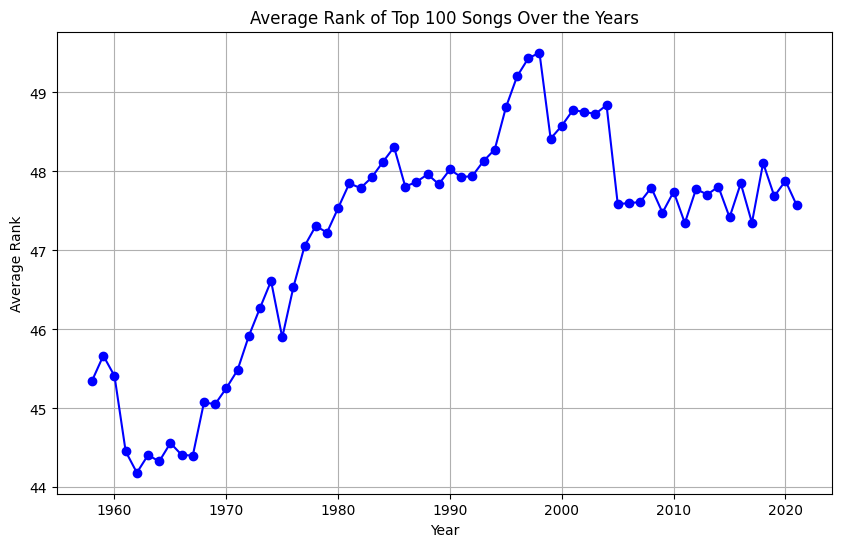

In [14]:
# 1a. How has the average rank of songs in the top 100 change over the years?
df_clean.loc[:, 'year'] = pd.to_datetime(df_clean.loc[:, 'date']).dt.year
average_rank_by_year = df_clean.groupby('year')['rank'].mean()

plt.figure(figsize=(10,6))
plt.plot(average_rank_by_year.index, average_rank_by_year.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Average Rank')
plt.title('Average Rank of Top 100 Songs Over the Years')
plt.grid(True)
plt.show()

###### It looks like that the Average Rank is between 44 and 49, meaning that most songs through out the years held this mean of rank.

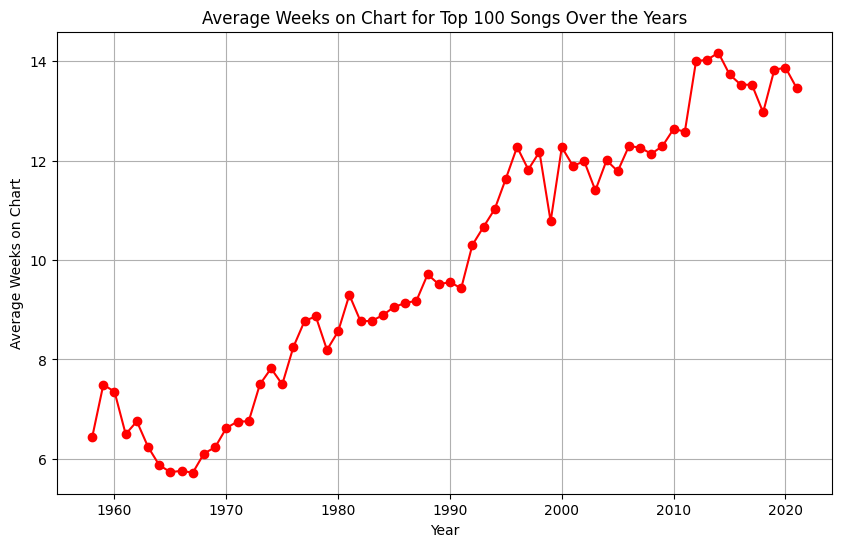

In [16]:
# 1b. Is there a noticeable trend in the number of weeks songs stay on the top 100 chart of the years?
average_week_by_year = df_clean.groupby('year')['weeks-on-board'].mean()

plt.figure(figsize=(10,6))
plt.plot(average_week_by_year.index, average_week_by_year.values, marker='o', linestyle='-', color='r')
plt.xlabel('Year')
plt.ylabel('Average Weeks on Chart')
plt.title('Average Weeks on Chart for Top 100 Songs Over the Years')
plt.grid(True)
plt.show()

###### With this chart, it looks like most songs in the top 100 between 1950 and 1980 held 6-8 weeks on board. Afterwards, the weeks on board has increased throughout the years.

In [19]:
# 2a. Which songs spent the most weeks at the number one spot?
number_one_songs = df_clean[df_clean['rank'] == 1]
weeks_at_number_one = number_one_songs.groupby('song')['weeks-on-board'].count()

most_weeks_at_number_one = weeks_at_number_one.idxmax()
most_weeks = weeks_at_number_one.max()
most_weeks_str = str(most_weeks)

print("The songs with the most weeks at number one: " + most_weeks_at_number_one)
print("Total weeks at number one: " + most_weeks_str)

The songs with the most weeks at number one: Old Town Road
Total weeks at number one: 19


###### This python analysis was a little tedious. Initially we used the sum() function, but it ended up adding all values within a song, and would give it a big number that didn't look right. When we used the count() function, it was able to count the number of weeks the song would hold the number one spot.

In [35]:
# 2b. What artist had the most songs at the number one spot?
artist_counts = number_one_songs.groupby('artist')['song'].nunique()

# Find the artist(s) with the most number one songs
artists_with_most_number_one_songs = artist_counts[artist_counts == artist_counts.max()]

print("Artist(s) with the most songs at number one: ")
print(artists_with_most_number_one_songs)

Artist(s) with the most songs at number one: 
artist
The Beatles    19
Name: song, dtype: int64


In [50]:
# 3a. How often do songs that reach the number one spot drop significantly in rank the following week?
dropped_significantly_count = 0
significant_drop_threshold = 10

for index, song in number_one_songs.iterrows():
    current_rank = song['rank']
    last_week_rank = song['last-week']
    
    if last_week_rank - current_rank > significant_drop_threshold:
        dropped_significantly_count += 1

total_number_one_songs = len(number_one_songs)
percentage_dropped_significantly = (dropped_significantly_count / total_number_one_songs) * 100
print(f"Percentage of songs that dropped significantly: {percentage_dropped_significantly:.2f}%")

Percentage of songs that dropped significantly: 1.33%
